In [1]:
import keras.optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
# load data
(X_train, y_train_labels), (X_test, y_test_labels) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Number: 2


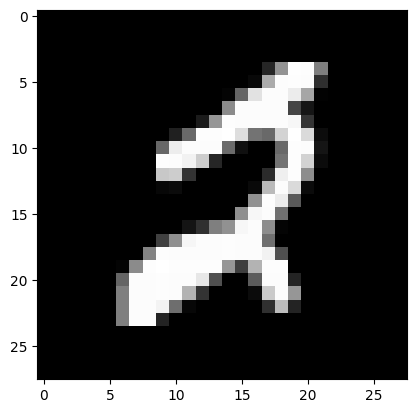

In [3]:
# random number
index = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[index], cmap="gray")
print(f"Number: {y_train_labels[index]}")
plt.show()

In [4]:
28*28

784

In [5]:
# Normalization
X_train.min(), X_train.max()

(0, 255)

In [6]:
print((X_train.min()/255.0, X_train.max()/255.0))
print((X_train.min()/127.5 - 1.0, X_train.max()/127.5 - 1.0))

(0.0, 1.0)
(-1.0, 1.0)


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [8]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28*28))
X_train.shape, X_test.shape  # [rows<images>: 60000, cols<px>:784]]

((60000, 784), (10000, 784))

In [9]:
# Create model
from keras.layers import Dense
from keras.models import Sequential

In [10]:
# Example 1
model1 = Sequential()

# 3 => 4 => 2
# input_layer: 3, hide_layer: 4
model1.add(Dense(4, input_shape=(3,), activation='relu'))
# output_layer: 2
model1.add(Dense(2, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Example 2
model2 = Sequential()

# 10 => 5 => 1
model2.add(Dense(5, input_shape=(10,), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary() # layer_1: 10 * 5 + 5(bias) = 55; layer_2: 5 * 1 + 1(bias) = 6

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [12]:
64 * 32 + 32

2080

In [13]:
model3 = Sequential()

model3.add(Dense(64, input_shape=(28*28,), activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [14]:
# is the same
model4 = Sequential([
    Dense(64, input_shape=(28*28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation="sigmoid")
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


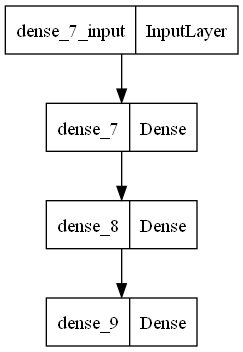

In [15]:
from keras.utils.vis_utils import plot_model

plot_model(model4)

In [16]:
config = model4.get_config()
config

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_7_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_7',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_8',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bia

In [17]:
# spoil the model
model5 = Sequential([
    Dense(6, input_shape=(28*28,), activation='relu'),
    Dense(1, activation='sigmoid')
])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 4710      
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 4,717
Trainable params: 4,717
Non-trainable params: 0
_________________________________________________________________


In [18]:
# load config in model5
model5 = model5.from_config(config)

model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [19]:
# compilation
model5.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [20]:
# data transfer
y_train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
from keras.utils.np_utils import to_categorical

# one hot
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
X_train.shape

(60000, 784)

In [23]:
235 * 256

60160

In [24]:
# example
model = Sequential([
    Dense(64, input_shape=(28*28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation="sigmoid")
])

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
history1 =model.fit(X_train, y_train,
                   epochs=5,
                   verbose=1,
                   validation_data=(X_test, y_test)
                   )

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6656 - accuracy: 0.8222 - val_loss: 0.3267 - val_accuracy: 0.9072
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3084 - accuracy: 0.9101 - val_loss: 0.2757 - val_accuracy: 0.9233
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2601 - accuracy: 0.9244 - val_loss: 0.2361 - val_accuracy: 0.9311
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2285 - accuracy: 0.9335 - val_loss: 0.2060 - val_accuracy: 0.9403
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2040 - accuracy: 0.9411 - val_loss: 0.1902 - val_accuracy: 0.9439


In [25]:
history2 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/5
48/48 [==============================] - 1s 9ms/step - loss: 0.1900 - accuracy: 0.9449 - val_loss: 0.1742 - val_accuracy: 0.9529
Epoch 2/5
48/48 [==============================] - 0s 8ms/step - loss: 0.1881 - accuracy: 0.9445 - val_loss: 0.1736 - val_accuracy: 0.9530
Epoch 3/5
48/48 [==============================] - 0s 8ms/step - loss: 0.1875 - accuracy: 0.9448 - val_loss: 0.1734 - val_accuracy: 0.9526
Epoch 4/5
48/48 [==============================] - 0s 8ms/step - loss: 0.1868 - accuracy: 0.9448 - val_loss: 0.1731 - val_accuracy: 0.9526
Epoch 5/5
48/48 [==============================] - 0s 9ms/step - loss: 0.1862 - accuracy: 0.9452 - val_loss: 0.1727 - val_accuracy: 0.9529


In [26]:
history2.history

{'loss': [0.1900332272052765,
  0.18811680376529694,
  0.18746843934059143,
  0.1868378221988678,
  0.18620958924293518],
 'accuracy': [0.944937527179718,
  0.9445416927337646,
  0.9447708129882812,
  0.9448124766349792,
  0.9452499747276306],
 'val_loss': [0.17416658997535706,
  0.17364923655986786,
  0.17340368032455444,
  0.1730981469154358,
  0.17274537682533264],
 'val_accuracy': [0.95291668176651,
  0.953000009059906,
  0.9525833129882812,
  0.9525833129882812,
  0.95291668176651]}

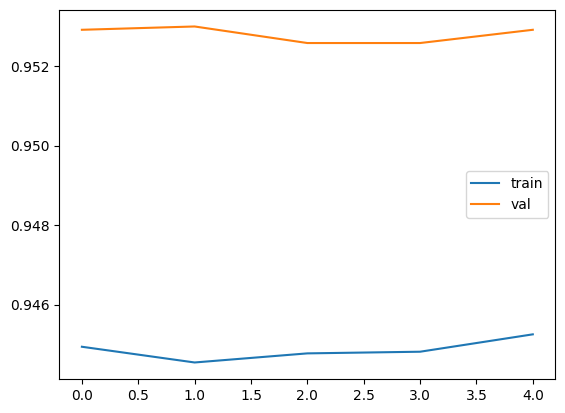

In [27]:
train_acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')

plt.legend()
plt.show()

In [28]:
history3 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 24s 5ms/step - loss: 0.1867 - accuracy: 0.9445 - val_loss: 0.1594 - val_accuracy: 0.9541
Epoch 2/5
4800/4800 [==============================] - 24s 5ms/step - loss: 0.1527 - accuracy: 0.9551 - val_loss: 0.1450 - val_accuracy: 0.9602
Epoch 3/5
4800/4800 [==============================] - 24s 5ms/step - loss: 0.1279 - accuracy: 0.9617 - val_loss: 0.1415 - val_accuracy: 0.9613
Epoch 4/5
4800/4800 [==============================] - 24s 5ms/step - loss: 0.1118 - accuracy: 0.9671 - val_loss: 0.1206 - val_accuracy: 0.9664
Epoch 5/5
4800/4800 [==============================] - 24s 5ms/step - loss: 0.0974 - accuracy: 0.9709 - val_loss: 0.1188 - val_accuracy: 0.9681


In [29]:
history4 = model.fit(X_train, y_train,
                     epochs=5,
                     batch_size=100,
                     verbose=1,
                     validation_split=0.2
                     )

Epoch 1/5
480/480 [==============================] - 3s 5ms/step - loss: 0.0778 - accuracy: 0.9782 - val_loss: 0.1068 - val_accuracy: 0.9708
Epoch 2/5
480/480 [==============================] - 3s 5ms/step - loss: 0.0751 - accuracy: 0.9793 - val_loss: 0.1067 - val_accuracy: 0.9714
Epoch 3/5
480/480 [==============================] - 2s 5ms/step - loss: 0.0737 - accuracy: 0.9794 - val_loss: 0.1063 - val_accuracy: 0.9711
Epoch 4/5
480/480 [==============================] - 3s 5ms/step - loss: 0.0727 - accuracy: 0.9800 - val_loss: 0.1061 - val_accuracy: 0.9712
Epoch 5/5
480/480 [==============================] - 3s 5ms/step - loss: 0.0716 - accuracy: 0.9801 - val_loss: 0.1053 - val_accuracy: 0.9715


In [30]:
# step_per_epoch

history5 = model.fit(X_train, y_train,
                     epochs=5,
                     batch_size=100,
                     steps_per_epoch=100,
                     verbose=1,
                     validation_split=0.2
                     )

Epoch 1/5
100/100 [==============================] - 1s 10ms/step - loss: 0.0724 - accuracy: 0.9797 - val_loss: 0.1061 - val_accuracy: 0.9708
Epoch 2/5
100/100 [==============================] - 1s 8ms/step - loss: 0.0738 - accuracy: 0.9807 - val_loss: 0.1064 - val_accuracy: 0.9707
Epoch 3/5
100/100 [==============================] - 1s 8ms/step - loss: 0.0678 - accuracy: 0.9809 - val_loss: 0.1062 - val_accuracy: 0.9712
Epoch 4/5
100/100 [==============================] - 1s 8ms/step - loss: 0.0710 - accuracy: 0.9795 - val_loss: 0.1049 - val_accuracy: 0.9710
Epoch 5/5
100/100 [==============================] - 1s 8ms/step - loss: 0.0702 - accuracy: 0.9819 - val_loss: 0.1060 - val_accuracy: 0.9712


In [31]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric # error, accuracy

79/79 [==============================] - 0s 4ms/step - loss: 0.0930 - accuracy: 0.9705


(0.09296678006649017, 0.9704999923706055)

In [32]:
X_test[0][None].shape

(1, 784)

In [33]:
predictions = model.predict(X_test[0][None])
predictions

1/1 [==============================] - 0s 118ms/step


array([[4.1341075e-01, 1.9172912e-02, 9.6769071e-01, 9.9872053e-01,
        1.5892258e-05, 8.8255554e-02, 7.9337169e-06, 9.9999142e-01,
        5.9157515e-01, 7.0758027e-01]], dtype=float32)

In [34]:
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([7], dtype=int64)

In [35]:
y_test_labels[:3]

array([7, 2, 1], dtype=uint8)

In [36]:
# save weights & model
model.save_weights('./samples/model_weights.h5')
model.save('./samples/model.h5')

In [37]:
from keras.models import load_model

load_model('./samples/model.h5').summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [38]:
config_mnist = model.get_config()
config_mnist

{'name': 'sequential_5',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_12_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_12',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_13',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    '

In [39]:
model5.from_config(config_mnist)
model5.load_weights('./samples/model_weights.h5')

In [40]:
# optimizers
from keras import optimizers

In [41]:
# SGD
optimizers.gradient_descent_v2.SGD(learning_rate=0.01, momentum=0.05)

In [42]:
# Adagrad
optimizers.adagrad_v2.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)

In [43]:
# RMSProp (Leaky Adagrad)
optimizers.rmsprop_v2.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

In [44]:
# Adam
optimizers.adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

In [45]:
# experiments
model = Sequential([
    Dense(64, input_shape=(28*28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.save_weights('./samples/experimental_weights.h5')

Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6605 - accuracy: 0.8253 - val_loss: 0.3297 - val_accuracy: 0.9071
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3116 - accuracy: 0.9102 - val_loss: 0.2670 - val_accuracy: 0.9254
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2591 - accuracy: 0.9255 - val_loss: 0.2343 - val_accuracy: 0.9336
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2264 - accuracy: 0.9355 - val_loss: 0.2060 - val_accuracy: 0.9413
Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3893 - accuracy: 0.6619 - val_loss: 0.8392 - val_accuracy: 0.8282
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6964 - accuracy: 0.8440 - val_loss: 0.5753 - val_accuracy: 0.8693
Epoch 3/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5386 - accuracy: 0.8698 - val_loss: 0.4800 - val_accuracy: 0.8845

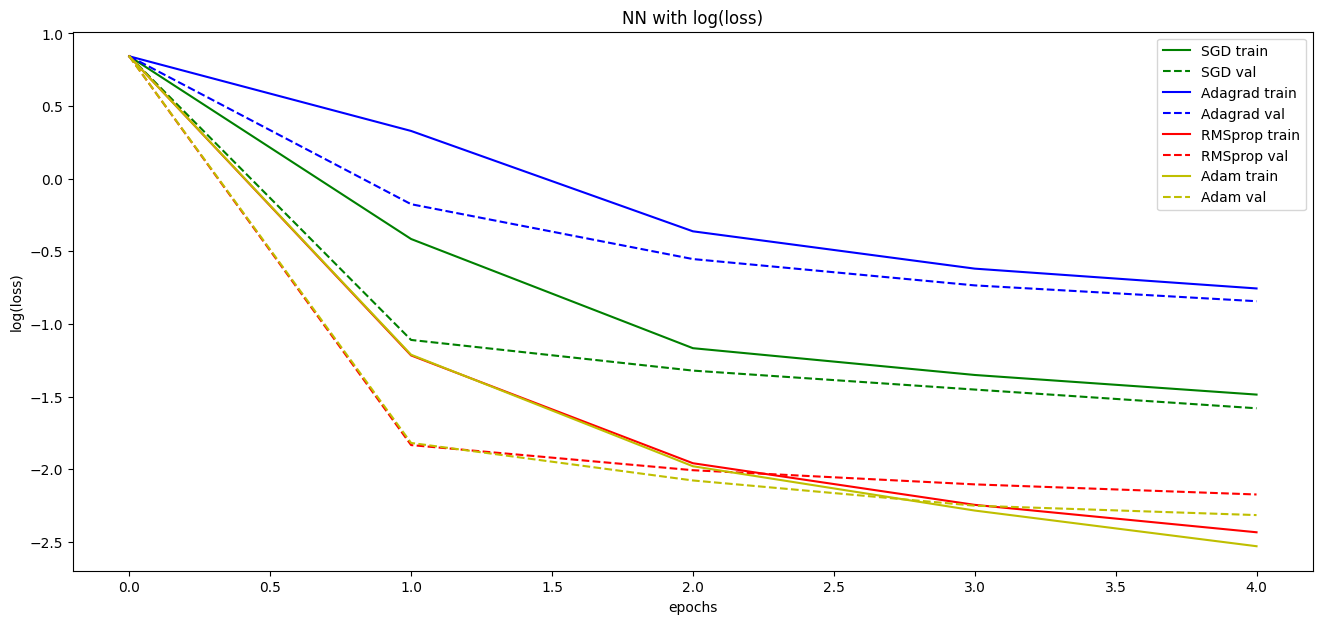

CPU times: total: 3min 6s
Wall time: 2min 38s


In [46]:
%%time

models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 4
batch_size = 32

epoch = np.arange(num_epochs+1)

for i, i_optim in enumerate([optimizers.gradient_descent_v2.SGD(),
                             optimizers.adagrad_v2.Adagrad(),
                             optimizers.rmsprop_v2.RMSProp(),
                             optimizers.adam_v2.Adam()
                            ]):
    model_i = Sequential([
        Dense(64, input_shape=(28*28,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model_i.load_weights('./samples/experimental_weights.h5')

    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics='accuracy'
    )

    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

    models[i_optim.get_config()['name']] = model_i

    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']), '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')

    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']), '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')

    print('=' * 20)

plt.legend()
plt.title('NN with log(loss)')
plt.xlabel('epochs')
plt.ylabel('log(loss)')
plt.show()

In [47]:
model_i = models['Adam']

In [48]:
model_i.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

1/1 [==============================] - 0s 97ms/step


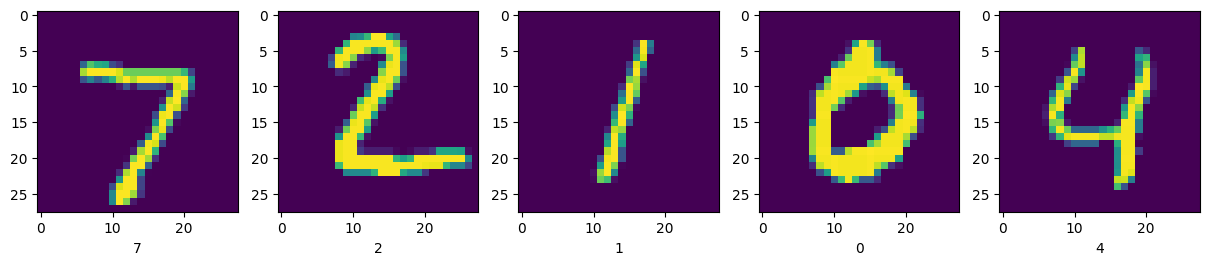

In [49]:
N = 5
y_pred = model_i.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_test[i, :].reshape(28, 28))
    plt.xlabel(str(y_pred_class[i]))
plt.show()

In [50]:
# Callbacks
from keras import callbacks

In [53]:
# ModelCheckPoint
model_checkpoint = callbacks.ModelCheckpoint(filepath='model_best_{epoch}',
                                             monitor='val_loss',
                                             verbose=1,
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto',
                                             period=1
                                             )
model.compile(optimizer=optimizers.adam_v2.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=num_epochs,
          steps_per_epoch=10,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[model_checkpoint])

Epoch 1/4
 9/10 [==========================>...] - ETA: 0s - loss: 0.2940 - accuracy: 0.9164
Epoch 1: val_loss improved from inf to 0.27346, saving model to model_best_1
INFO:tensorflow:Assets written to: model_best_1\assets
10/10 [==============================] - 2s 156ms/step - loss: 0.2920 - accuracy: 0.9175 - val_loss: 0.2735 - val_accuracy: 0.9238
Epoch 2/4
 9/10 [==========================>...] - ETA: 0s - loss: 0.2697 - accuracy: 0.9244
Epoch 2: val_loss improved from 0.27346 to 0.25792, saving model to model_best_2
INFO:tensorflow:Assets written to: model_best_2\assets
10/10 [==============================] - 2s 166ms/step - loss: 0.2698 - accuracy: 0.9245 - val_loss: 0.2579 - val_accuracy: 0.9279
Epoch 3/4
 9/10 [==========================>...] - ETA: 0s - loss: 0.2537 - accuracy: 0.9284
Epoch 3: val_loss improved from 0.25792 to 0.24318, saving model to model_best_3
INFO:tensorflow:Assets written to: model_best_3\assets
10/10 [==============================] - 1s 136ms/step 

In [55]:
# EarlyStopping
early_stop = callbacks.EarlyStopping(monitor='loss',
                                     min_delta=0,
                                     patience=5,
                                     verbose=1,
                                     mode='auto',
                                     baseline=0.006,
                                     restore_best_weights=False
                                     )

model.fit(X_train, y_train,
          verbose=1,
          epochs=num_epochs,
          steps_per_epoch=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/4
100/100 [==============================] - 1s 12ms/step - loss: 0.2117 - accuracy: 0.9396 - val_loss: 0.1855 - val_accuracy: 0.9464
Epoch 2/4
100/100 [==============================] - 1s 11ms/step - loss: 0.1733 - accuracy: 0.9509 - val_loss: 0.1648 - val_accuracy: 0.9524
Epoch 3/4
100/100 [==============================] - 1s 13ms/step - loss: 0.1505 - accuracy: 0.9570 - val_loss: 0.1478 - val_accuracy: 0.9580
Epoch 4/4
100/100 [==============================] - 1s 12ms/step - loss: 0.1324 - accuracy: 0.9617 - val_loss: 0.1381 - val_accuracy: 0.9605


In [56]:
# ReduceLROnPlateau
reduce_rl = callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                        factor=0.1,
                                        patience=0,
                                        verbose=1,
                                        mode='auto',
                                        min_delta=0.001,
                                        cooldown=0,
                                        min_lr=1e-10)

model.fit(X_train, y_train,
          verbose=1,
          epochs=num_epochs,
          steps_per_epoch=100,
          validation_data=(X_test, y_test),
          callbacks=[reduce_rl]
          )

Epoch 1/4
100/100 [==============================] - 1s 12ms/step - loss: 0.1172 - accuracy: 0.9663 - val_loss: 0.1279 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 2/4
100/100 [==============================] - 1s 11ms/step - loss: 0.1068 - accuracy: 0.9693 - val_loss: 0.1240 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 3/4
100/100 [==============================] - 1s 11ms/step - loss: 0.0978 - accuracy: 0.9720 - val_loss: 0.1154 - val_accuracy: 0.9671 - lr: 0.0010
Epoch 4/4
 98/100 [============================>.] - ETA: 0s - loss: 0.0893 - accuracy: 0.9745
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 2s 18ms/step - loss: 0.0893 - accuracy: 0.9744 - val_loss: 0.1127 - val_accuracy: 0.9672 - lr: 0.0010
